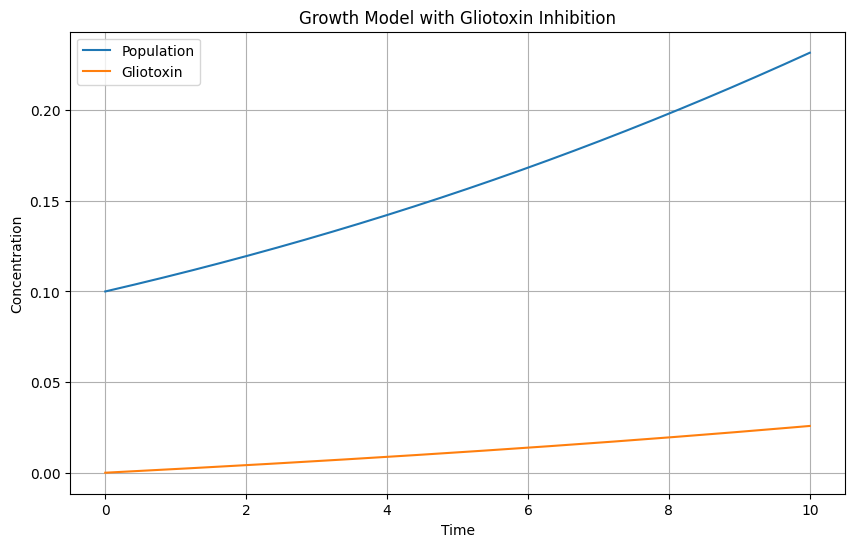

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the growth model with gliotoxin inhibition
def growth_model_with_gliotoxin(y, t, r, K, alpha, beta, gamma, gliotoxin):
    population = y[0]
    gliotoxin_conc = y[1]
    d_population = r * population * (1 - population / K) - alpha * population * gliotoxin_conc
    d_gliotoxin = -beta * gliotoxin_conc + gamma * population
    return [d_population, d_gliotoxin]

# Set the initial conditions and parameters
initial_population = 0.1  # Initial population size
initial_gliotoxin = 0.0  # Initial gliotoxin concentration
r = 0.1  # Growth rate
K = 1.0  # Carrying capacity
alpha = 0.01  # Inhibition rate by gliotoxin
beta = 0.05  # Decay rate of gliotoxin
gamma = 0.02  # Production rate of gliotoxin

# Set the time points for simulation
t = np.linspace(0, 10, 1000)  # Simulation time from 0 to 10 with 1000 time points

# Define the gliotoxin profile (e.g., a step function)
gliotoxin_profile = np.zeros_like(t)
gliotoxin_profile[t >= 2] = 0.5  # Gliotoxin concentration is 0.5 after time 2

# Set the initial conditions array
initial_conditions = [initial_population, initial_gliotoxin]

# Solve the ODE system
solution = odeint(growth_model_with_gliotoxin, initial_conditions, t,
                  args=(r, K, alpha, beta, gamma, gliotoxin_profile))

# Extract the population and gliotoxin concentrations from the solution
population = solution[:, 0]
gliotoxin = solution[:, 1]

# Plot the population and gliotoxin concentrations over time
plt.figure(figsize=(10, 6))
plt.plot(t, population, label='Population')
plt.plot(t, gliotoxin, label='Gliotoxin')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Growth Model with Gliotoxin Inhibition')
plt.grid(True)
plt.show()
